In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings('ignore')
from keras.utils import to_categorical
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential

In [3]:
path2 = r"D:\Mask No Mask"
cate = ['mask' , 'no_mask']

In [5]:
image_size = 200 # hyper- parameter

path2 = r"D:\Mask  No Mask"
cate = ['mask' , 'no_mask']

input_imageM = [] # empty list
for i in cate:
    folders = os.path.join(path2, i)
    label   = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array, (image_size, image_size))
        input_imageM.append([image_array, label])

In [7]:
# why are we shuffiling it --> because images are stacked by categories
np.random.shuffle(input_imageM)

In [9]:
# IMP
len(input_imageM)

7553

In [11]:
# Sampeling
train = input_imageM[0:6042]
test =  input_imageM[6042:]

In [13]:
X_train = []
Y_train = []

for X_values , labels in train:
    X_train.append(X_values)
    Y_train.append(labels)

In [15]:
X_test = []
Y_test = []

for X_values , labels in test:
    X_test.append(X_values)
    Y_test.append(labels)

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [19]:
Y_train = np.array(Y_train)

In [21]:
# 255 is the higest pixel value
X_train = X_train/255
X_test = X_test/255

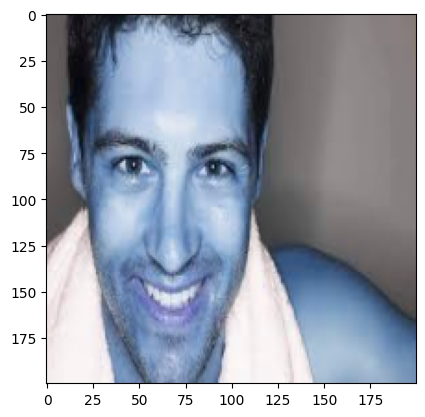

In [23]:
plt.imshow(X_train[21])

In [25]:
Y_train = to_categorical(Y_train) # something like (1 hot encoding)

In [27]:
model = Sequential() # Initial the Model, Padding= 'same' --> Using the pad
# 1st Layer of Conv & Pooling:
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu')) # No of sliders kernel_size = (5,5) exel compare slider 
 
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd Layer of Conv & Pooling:
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu', input_shape= X_train.shape[1:])) #Fully Connected Layer
model.add(Dropout(0.2))
model.add(Dense(2, activation= 'softmax')) #Output layer    2 because we have only 2 cate (dog and cat)

In [31]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [33]:
model.fit(X_train , Y_train , validation_split = .2 ,  epochs = 3,batch_size = 128)

Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 64s 891ms/step - accuracy: 0.6220 - loss: 1.7534 - val_accuracy: 0.8470 - val_loss: 0.3501
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 699ms/step - accuracy: 0.8766 - loss: 0.3076 - val_accuracy: 0.8925 - val_loss: 0.2693
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 663ms/step - accuracy: 0.8969 - loss: 0.2445 - val_accuracy: 0.9049 - val_loss: 0.2326


In [35]:
pred_test = model.predict(X_test)
pred_test

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step


array([[0.4194284 , 0.5805716 ],
       [0.96647537, 0.03352458],
       [0.98651135, 0.01348868],
       ...,
       [0.00939955, 0.99060047],
       [0.9279213 , 0.07207871],
       [0.02690973, 0.97309023]], dtype=float32)

In [37]:
pred_class = pred_test.argmax(axis =1)  # It will take the index positions of columns with max value

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
tab1 = confusion_matrix(Y_test , pred_class)
tab1

array([[655,  66],
       [ 81, 709]], dtype=int64)

In [43]:
print(classification_report(Y_test , pred_class))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       721
           1       0.91      0.90      0.91       790

    accuracy                           0.90      1511
   macro avg       0.90      0.90      0.90      1511
weighted avg       0.90      0.90      0.90      1511

